In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

Exploring The Dataset

In [2]:
df = pd.read_csv(r"E:\Data Solution 360\Python\Assignment\ecommerce_customer_behavior_dataset.csv")

In [30]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [18]:
num_duplicates = df.duplicated().sum()
print(f"Total number of duplicate rows in the dataset: {num_duplicates}")

Total number of duplicate rows in the dataset: 0


In [19]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


<h1>Level 1: Basic Insights </h1>

Q1: Find Mean, Median, and Mode (Age)


In [6]:
import numpy as np
from scipy import stats
from statistics import multimode

In [7]:
# Age column select
ages = df['Age']

In [8]:
# Mean, Median, Mode
mean_age = np.mean(ages)
median_age = np.median(ages)
mode_age = stats.mode(ages,keepdims=True).mode 

In [9]:
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Mean Age: 43.7899
Median Age: 44.0
Mode Age: [51]


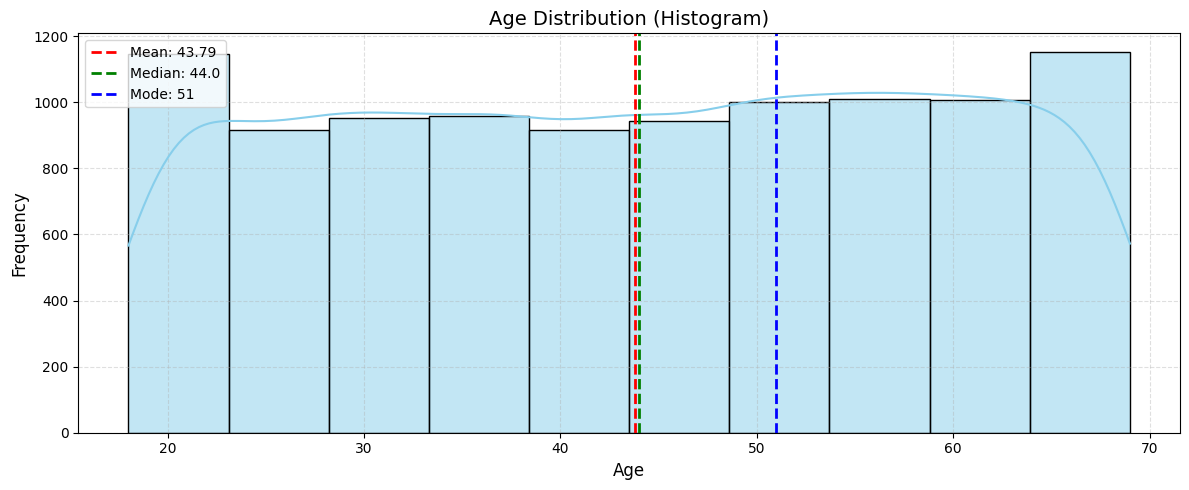

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mean, Median, Mode
mean_age = 43.7899
median_age = 44.0
mode_age = 51

plt.figure(figsize=(12,5))

# Histogram
sns.histplot(
    ages,
    bins=10,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Add mean, median, mode lines
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_age:.2f}")
plt.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f"Median: {median_age}")
plt.axvline(mode_age, color='blue', linestyle='--', linewidth=2, label=f"Mode: {mode_age}")

plt.title("Age Distribution (Histogram)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


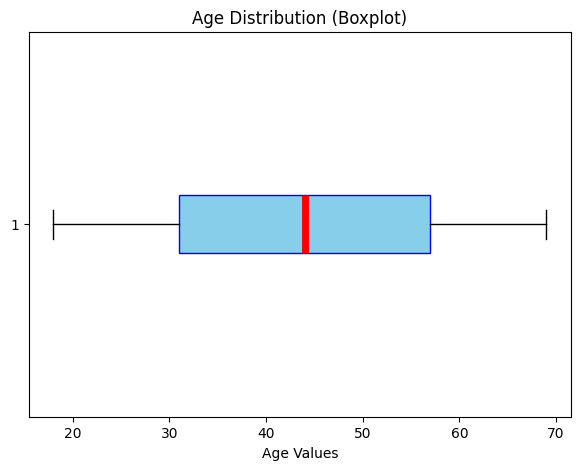

In [41]:

# Boxplot
plt.figure(figsize=(7,5))

plt.boxplot(
    ages,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=5)
)

plt.title("Age Distribution (Boxplot)")
plt.xlabel("Age Values")
plt.show()



Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [37]:

# 2. Select Purchase Amount column
purchase = df["Purchase Amount ($)"]

# 3. Variance
variance = np.var(purchase, ddof=0)   # population variance

# 4. Standard Deviation
std_dev = np.std(purchase, ddof=0)    # population standard deviation

# 5. Z-score
from scipy import stats
z_scores = stats.zscore(purchase)

# 6. Print results
print("Variance: {:.2f}".format(variance))
print("Standard Deviation: {:.2f}".format(std_dev))
print("First 10 Z-scores:\n", z_scores[:10])

Variance: 81924.05
Standard Deviation: 286.22
First 10 Z-scores:
 [-1.05285627  0.531219    1.60628694 -0.0639447  -1.25993202  0.87867442
  1.26655275 -1.40020688  1.46978535 -1.11539476]


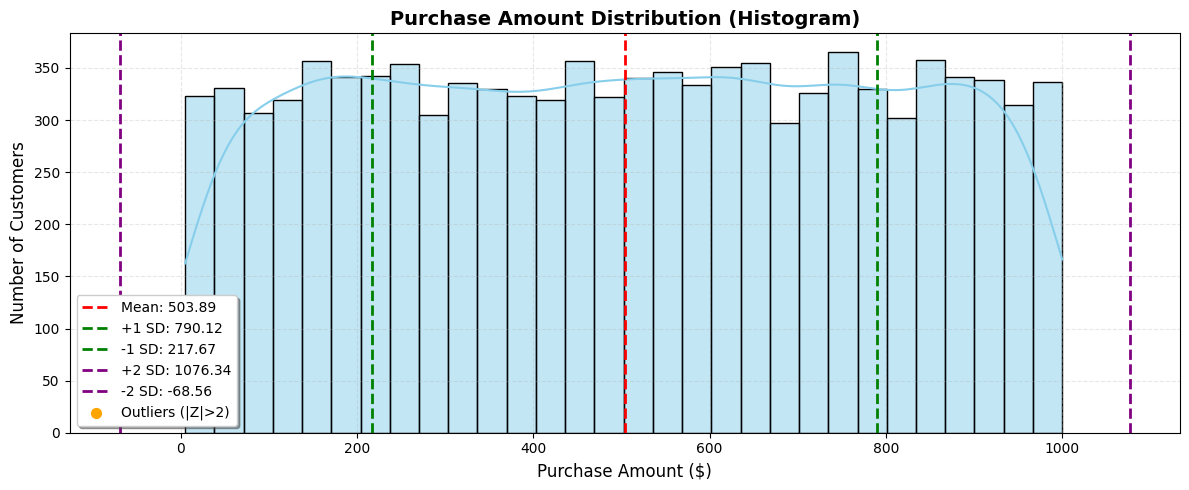

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mean & Std
mean_val = np.mean(purchase)
std_val = np.std(purchase, ddof=0)

plt.figure(figsize=(12,5))

# Histogram
sns.histplot(
    purchase,
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Mean line
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")

# ±1 Standard Deviation lines
plt.axvline(mean_val + std_val, color='green', linestyle='--', linewidth=2, label=f"+1 SD: {mean_val + std_val:.2f}")
plt.axvline(mean_val - std_val, color='green', linestyle='--', linewidth=2, label=f"-1 SD: {mean_val - std_val:.2f}")

# ±2 Standard Deviation lines
plt.axvline(mean_val + 2*std_val, color='purple', linestyle='--', linewidth=2, label=f"+2 SD: {mean_val + 2*std_val:.2f}")
plt.axvline(mean_val - 2*std_val, color='purple', linestyle='--', linewidth=2, label=f"-2 SD: {mean_val - 2*std_val:.2f}")

# Highlight outliers (|Z| > 2)
outliers = purchase[np.abs(z_scores) > 2]
plt.scatter(outliers, [0]*len(outliers), color='orange', s=50, zorder=5, label='Outliers (|Z|>2)')

# Titles & labels
plt.title("Purchase Amount Distribution (Histogram)", fontsize=14, fontweight='bold')
plt.xlabel("Purchase Amount ($)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Grid and Legend
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(frameon=True, shadow=True)

plt.tight_layout()
plt.show()


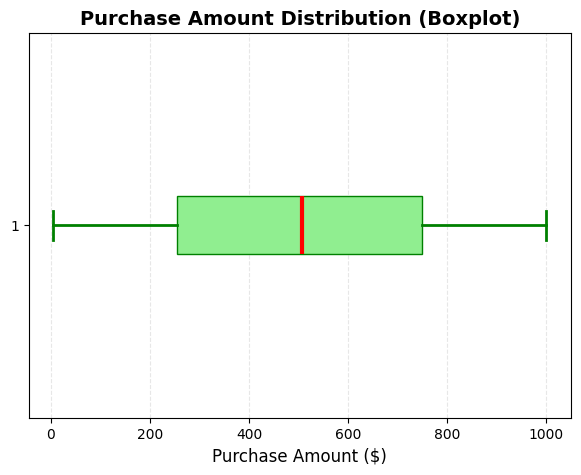

In [43]:
# Boxplot to show outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.boxplot(
    purchase,
    vert=False,  # horizontal, like ages
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=dict(color='red', linewidth=3),
    whiskerprops=dict(color='green', linewidth=2),
    capprops=dict(color='green', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none')
)

plt.title("Purchase Amount Distribution (Boxplot)", fontsize=14, weight='bold')
plt.xlabel("Purchase Amount ($)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.show()


Q3: What are the top three product categories based on the number of purchases? 

In [42]:
# 1. Count of each Product Category
category_counts = df["Product Category"].value_counts()

# 2. Top 3 categories
top3_categories = category_counts.head(3)

print("Top 3 Product Categories based on number of purchases:")
print(top3_categories)


Top 3 Product Categories based on number of purchases:
Product Category
Electronics    1309
Clothing       1297
Toys           1288
Name: count, dtype: int64


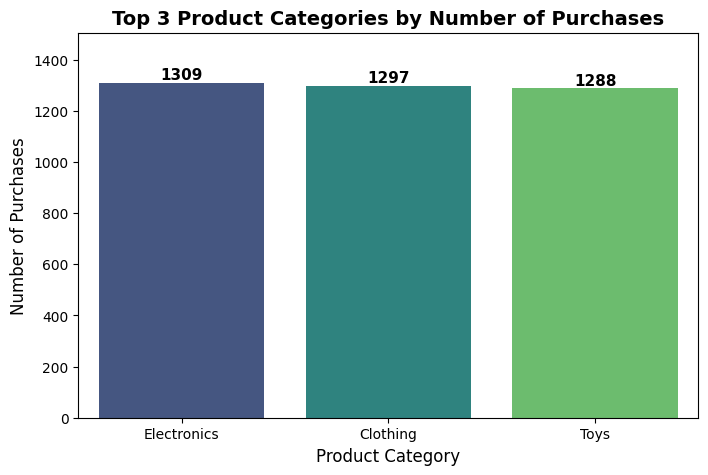

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 3 categories
top3_categories = df["Product Category"].value_counts().head(3)

# Bar plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=top3_categories.index, y=top3_categories.values, palette='viridis')

# Add value labels on top of each bar
for i, value in enumerate(top3_categories.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Top 3 Product Categories by Number of Purchases", fontsize=14, weight='bold')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.ylim(0, max(top3_categories.values)*1.15)  # give space on top for labels
plt.show()


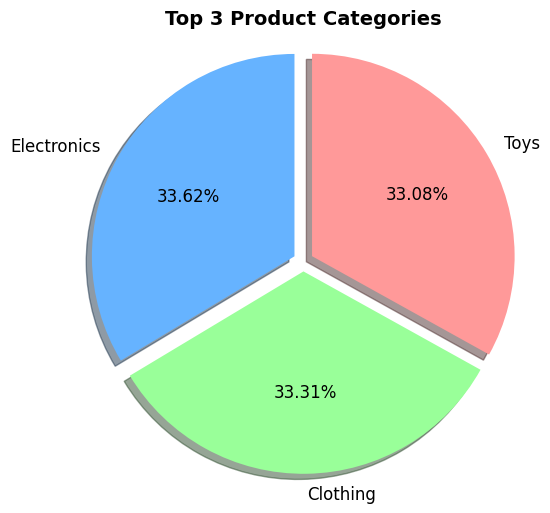

In [77]:
import matplotlib.pyplot as plt

top3_categories = df["Product Category"].value_counts().head(3)
labels = top3_categories.index
n = len(top3_categories)
explode = [0.05]*n

colors = ['#66b3ff','#99ff99','#ff9999']

plt.figure(figsize=(6,6))
plt.pie(
    top3_categories.values,
    labels=labels,
    autopct='%1.2f%%',
    colors=colors[:n],
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize':12}
)

plt.title("Top 3 Product Categories", fontsize=14, weight='bold')
plt.axis('equal')
plt.show()


Q4: How many customers are classified as return customers? 

In [45]:
# Count of return customers
return_count = df["Return Customer"].sum()

# Total number of customers
total_customers = df.shape[0]

print("Number of return customers:", return_count)
print("Total customers:", total_customers)
print("Percentage of return customers: {:.2f}%".format((return_count/total_customers)*100))


Number of return customers: 4996
Total customers: 10000
Percentage of return customers: 49.96%


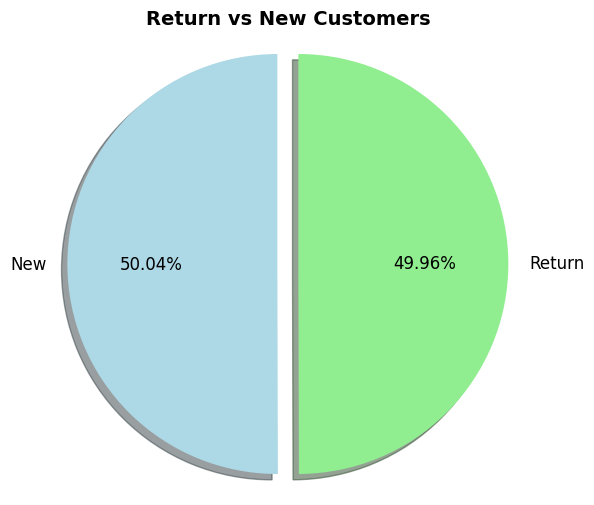

In [63]:
# Pie chart of Return vs New customers
import matplotlib.pyplot as plt

counts = df["Return Customer"].value_counts()
labels = ['New', 'Return']

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.2f%%',   # show 2 decimal places
    colors=['lightblue','lightgreen'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True,
    textprops={'fontsize':12}  # only fontsize
)

plt.title("Return vs New Customers", fontsize=14, weight='bold')
plt.axis('equal')
plt.show()


Q5: What is the average review score given by customers? 

In [4]:
# Average review score
average_score = df["Review Score (1-5)"].mean()

print("Average Review Score:", round(average_score, 2))


Average Review Score: 3.0


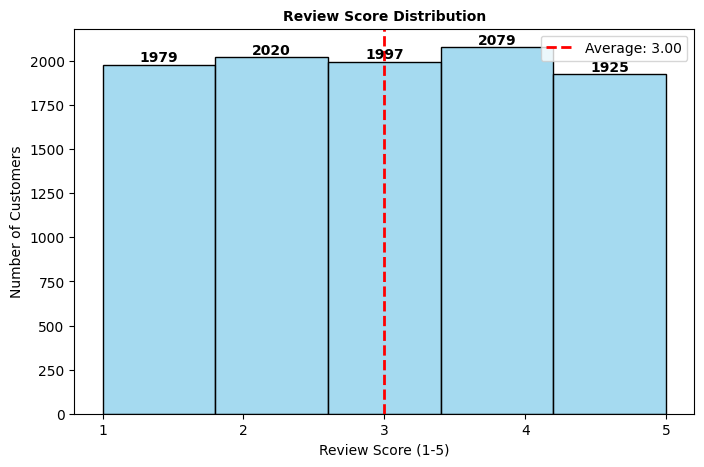

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
ax = sns.histplot(df["Review Score (1-5)"], bins=5, kde=False, color='skyblue', edgecolor='black')

# Add average line
avg_score = df["Review Score (1-5)"].mean()
plt.axvline(avg_score, color='red', linestyle='--', linewidth=2, label=f"Average: {avg_score:.2f}")

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.1, str(int(height)),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Review Score Distribution",fontsize=10, fontweight='bold')
plt.xlabel("Review Score (1-5)")
plt.ylabel("Number of Customers")
plt.xticks([1,2,3,4,5])
plt.legend()
plt.show()


Q6: How does the average delivery time vary beween subscription statuses (Free, 
Premium)? 

In [67]:
# Average delivery time by Subscription Status
avg_delivery = df.groupby("Subscription Status")["Delivery Time (days)"].mean()

print("Average Delivery Time by Subscription Status:")
print(avg_delivery)


Average Delivery Time by Subscription Status:
Subscription Status
Free       6.963924
Premium    7.070347
Trial      7.004272
Name: Delivery Time (days), dtype: float64


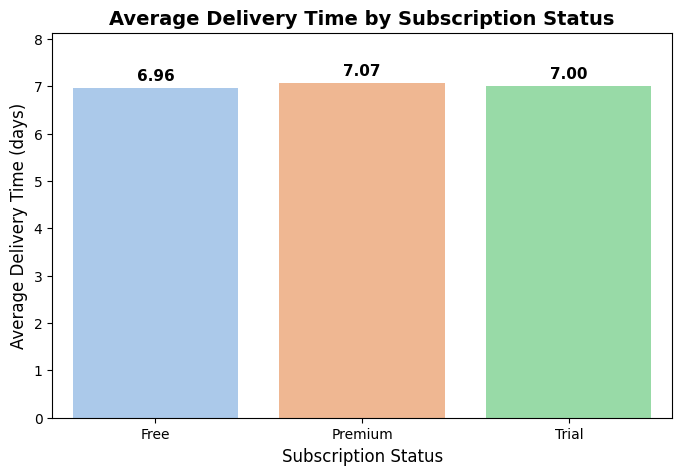

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average delivery time by subscription status
avg_delivery = df.groupby("Subscription Status")["Delivery Time (days)"].mean()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_delivery.index, y=avg_delivery.values, palette='pastel')

# Add value labels on top of bars
for i, value in enumerate(avg_delivery.values):
    plt.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Average Delivery Time by Subscription Status", fontsize=14, weight='bold')
plt.xlabel("Subscription Status", fontsize=12)
plt.ylabel("Average Delivery Time (days)", fontsize=12)
plt.ylim(0, max(avg_delivery.values)*1.15)  # space for labels
plt.show()


Q7: How many customers are subscribed to the service?

In [53]:
# Count of subscribed customers (Premium)
subscribed_count = df[df["Subscription Status"] == "Premium"].shape[0]

# Total customers
total_customers = df.shape[0]

print("Number of subscribed customers (Premium):", subscribed_count)
print("Total customers:", total_customers)
print("Percentage of subscribed customers: {:.2f}%".format((subscribed_count/total_customers)*100))


Number of subscribed customers (Premium): 3369
Total customers: 10000
Percentage of subscribed customers: 33.69%


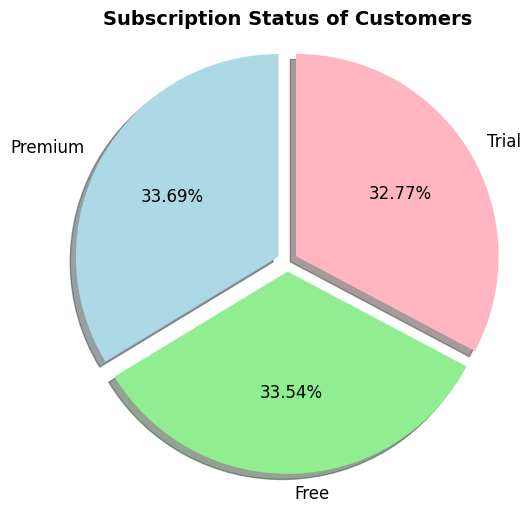

In [74]:
import matplotlib.pyplot as plt

counts = df["Subscription Status"].value_counts()
labels = counts.index
n = len(counts)
explode = [0.05]*n

# Define 3 fixed colors
colors = ['lightblue','lightgreen','lightpink']

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.2f%%',
    colors=colors[:n],  
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize':12}
)

plt.title("Subscription Status of Customers", fontsize=14, weight='bold')
plt.ylabel("")
plt.axis('equal')
plt.show()


Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop, 
Tablet) 

In [55]:
# Percentage of customers by Device Type
device_percent = df["Device Type"].value_counts(normalize=True) * 100

print("Percentage of customers by Device Type:")
print(device_percent.round(2))


Percentage of customers by Device Type:
Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: proportion, dtype: float64


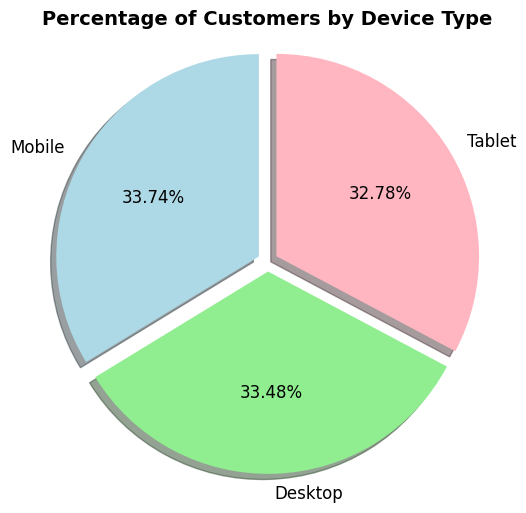

In [78]:
import matplotlib.pyplot as plt

device_percent = df["Device Type"].value_counts()
labels = device_percent.index
n = len(device_percent)
explode = [0.05]*n

colors = ['lightblue','lightgreen','lightpink']

plt.figure(figsize=(6,6))
plt.pie(
    device_percent.values,
    labels=labels,
    autopct='%1.2f%%',
    colors=colors[:n],
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize':12}
)

plt.title("Percentage of Customers by Device Type", fontsize=14, weight='bold')
plt.axis('equal')
plt.show()


Q9: What is the average purchase amount for customers who availed discounts compared 
to those who didnʼt? 

In [79]:
# Average purchase amount by Discount Availed
avg_purchase_discount = df.groupby("Discount Availed")["Purchase Amount ($)"].mean()

print("Average Purchase Amount by Discount Availed:")
print(avg_purchase_discount)


Average Purchase Amount by Discount Availed:
Discount Availed
False    502.511451
True     505.264178
Name: Purchase Amount ($), dtype: float64


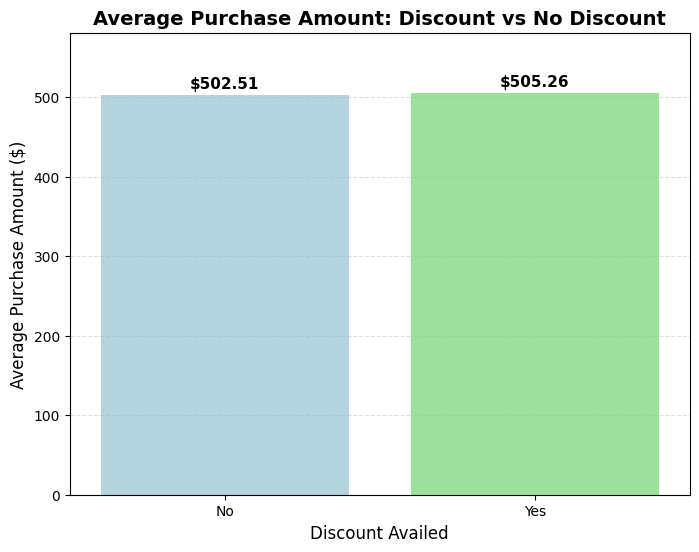

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_purchase_discount = df.groupby("Discount Availed")["Purchase Amount ($)"].mean()
labels = ["No", "Yes"]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=labels, y=avg_purchase_discount.values, palette=['lightblue','lightgreen'])

# Add value labels on top of bars
for i, value in enumerate(avg_purchase_discount.values):
    ax.text(i, value + 5, f"${value:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Average Purchase Amount: Discount vs No Discount", fontsize=14, weight='bold')
plt.xlabel("Discount Availed", fontsize=12)
plt.ylabel("Average Purchase Amount ($)", fontsize=12)
plt.ylim(0, max(avg_purchase_discount.values)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


Q10: What is the most common payment method used by customers? 

In [82]:
# Count of each payment method
payment_counts = df["Payment Method"].value_counts()

# Most common payment method
most_common_payment = payment_counts.idxmax()
most_common_count = payment_counts.max()

print("Most common payment method:", most_common_payment)
print("Number of customers using it:", most_common_count)


Most common payment method: Bank Transfer
Number of customers using it: 2067


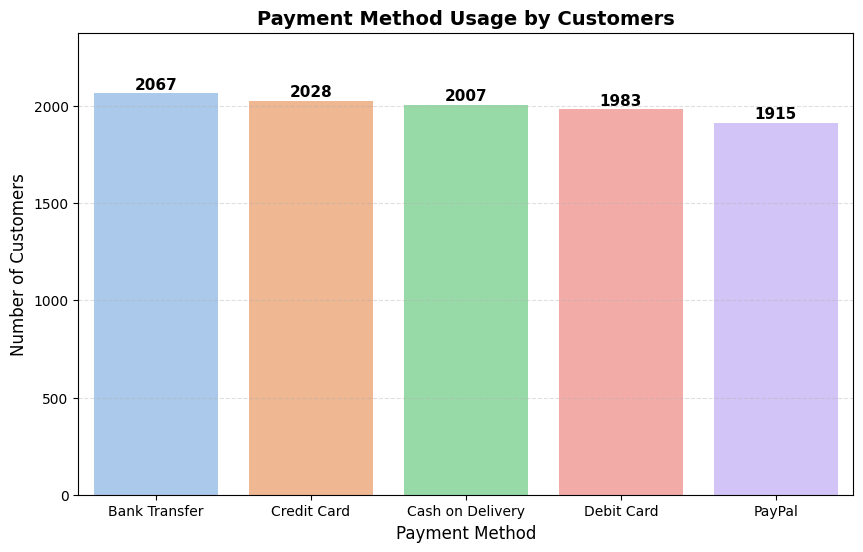

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')

# Add value labels on top of bars
for i, value in enumerate(payment_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Payment Method Usage by Customers", fontsize=14, weight='bold')
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.ylim(0, max(payment_counts.values)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


<h1>Level 2: Intermediate Insights </h1>

Q1: What are the average review scores of users of the most common payment method? 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


most_common_payment = df['Payment Method'].mode()[0]
users_common_payment = df[df['Payment Method'] == most_common_payment]
average_review_score = users_common_payment['Review Score (1-5)'].mean()

print(f"Most common payment method: {most_common_payment}")
print(f"Average review score for this method: {average_review_score:.2f}")


Most common payment method: Bank Transfer
Average review score for this method: 2.99


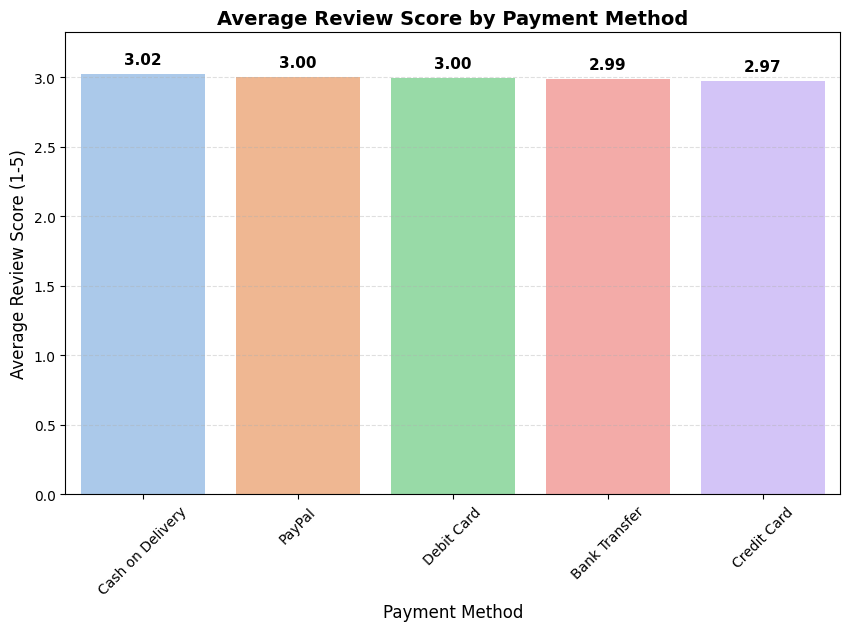

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_review_by_payment = df.groupby('Payment Method')['Review Score (1-5)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=avg_review_by_payment.index, y=avg_review_by_payment.values, palette='pastel')

# Add value labels on top of bars
for i, value in enumerate(avg_review_by_payment.values):
    ax.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Average Review Score by Payment Method', fontsize=14, weight='bold')
plt.ylabel('Average Review Score (1-5)', fontsize=12)
plt.xlabel('Payment Method', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, max(avg_review_by_payment.values)*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


 Q2: 
What is the correlation between time spent on the website and purchase amount? Do 
customers who spend more time on the website purchase more items? 

In [103]:
import pandas as pd

# Calculate correlation
correlation = df['Time_Spent_on_Website_min'].corr(df['Purchase_Amount_$'])
print(f"Correlation between time spent and purchase amount: {correlation:.2f}")


Correlation between time spent and purchase amount: 0.01


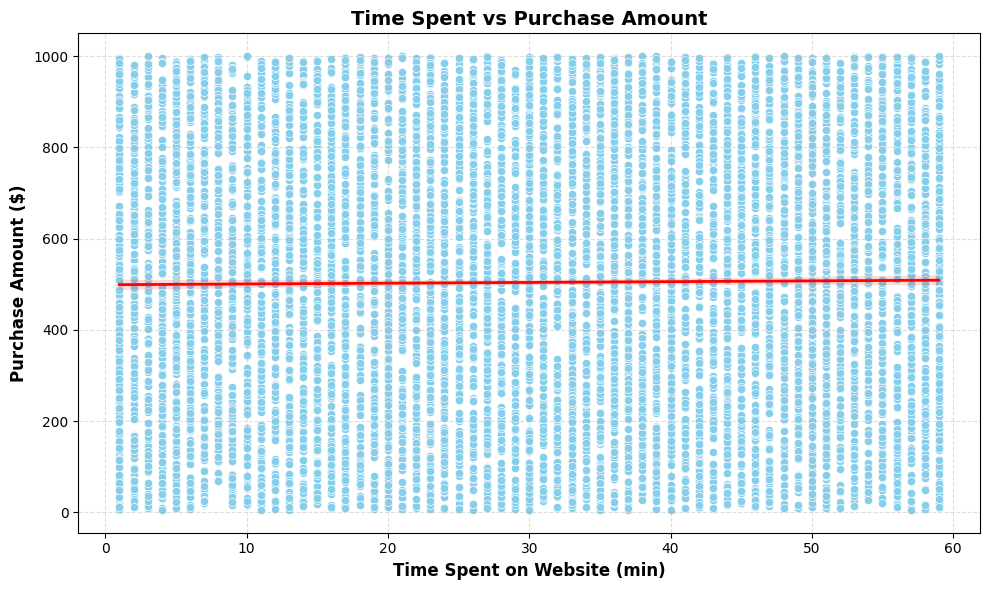

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Time_Spent_on_Website_min', y='Purchase_Amount_$', data=df, color='skyblue')
sns.regplot(x='Time_Spent_on_Website_min', y='Purchase_Amount_$', data=df, scatter=False, color='red', line_kws={'linewidth':2})

plt.xlabel('Time Spent on Website (min)', fontsize=12, fontweight='bold')
plt.ylabel('Purchase Amount ($)', fontsize=12, fontweight='bold')
plt.title('Time Spent vs Purchase Amount', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return 
customers? 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter satisfied customers (Review Score 4 or 5)
satisfied_customers = df[df['Review Score (1-5)'] >= 4]

# Step 2: Filter return customers among satisfied customers
satisfied_return_customers = satisfied_customers[satisfied_customers['Return Customer'] == True]

# Step 3: Calculate percentage
percentage = (len(satisfied_return_customers) / len(df)) * 100

print(f"Percentage of satisfied return customers: {percentage:.2f}%")


Percentage of satisfied return customers: 20.08%


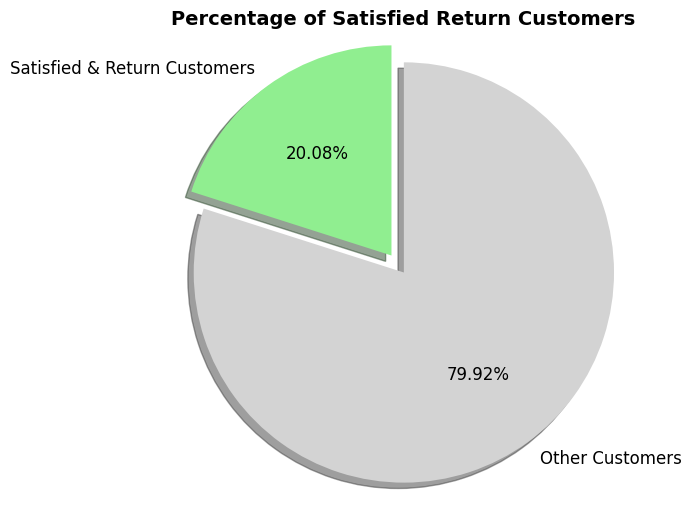

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter satisfied customers (Review Score 4 or 5)
satisfied_customers = df[df['Review Score (1-5)'] >= 4]

# Step 2: Filter return customers among satisfied customers
satisfied_return_customers = satisfied_customers[satisfied_customers['Return Customer'] == True]

# Step 3: Count values for pie chart
satisfied_return_count = len(satisfied_return_customers)
other_customers_count = len(df) - satisfied_return_count

sizes = [satisfied_return_count, other_customers_count]
labels = ['Satisfied & Return Customers', 'Other Customers']
colors = ['lightgreen', 'lightgray']
explode = [0.05, 0.05]

# Step 4: Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize':12}
)

plt.title('Percentage of Satisfied Return Customers', fontsize=14, weight='bold')
plt.axis('equal')
plt.show()


Q4: What is the relationship between the number of items purchased and customer 
satisfaction? 

Average Number of Items Purchased by Satisfaction Level:
 Customer Satisfaction
High      4.947639
Low       4.988707
Medium    5.058841
Name: Number of Items Purchased, dtype: float64


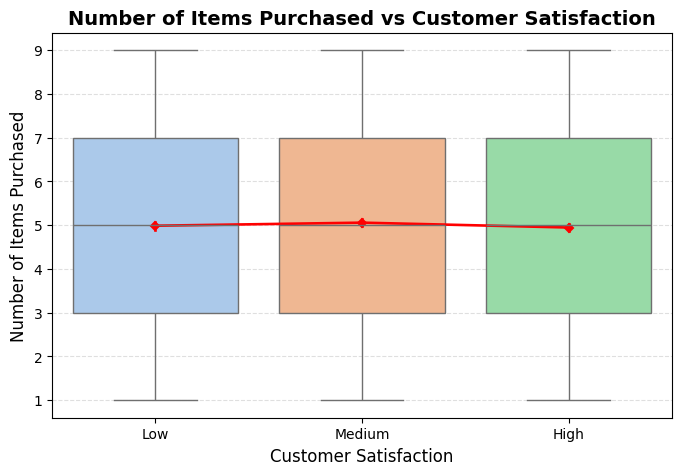

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_items = df.groupby('Customer Satisfaction')['Number of Items Purchased'].mean()
print("Average Number of Items Purchased by Satisfaction Level:\n", avg_items)

plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Satisfaction', y='Number of Items Purchased', data=df, palette='pastel')

# Overlay mean points
sns.pointplot(x='Customer Satisfaction', y='Number of Items Purchased', data=df, estimator='mean',
              color='red', markers='D', scale=0.7)

plt.title('Number of Items Purchased vs Customer Satisfaction', fontsize=14, weight='bold')
plt.xlabel('Customer Satisfaction', fontsize=12)
plt.ylabel('Number of Items Purchased', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


Q5: Which location has the 2nd highest average purchase amount?

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate average purchase amount per location
avg_purchase_by_location = df.groupby('Location')['Purchase Amount ($)'].mean()

# Step 2: Sort descending and take top 5
top5 = avg_purchase_by_location.sort_values(ascending=False).head(5)

# Step 3: Extract 2nd highest location and amount
second_highest_location = top5.index[1]
second_highest_amount = top5.iloc[1]

print(f"Location with 2nd highest average purchase: {second_highest_location} (${second_highest_amount:.2f})")

Location with 2nd highest average purchase: Barisal ($513.67)


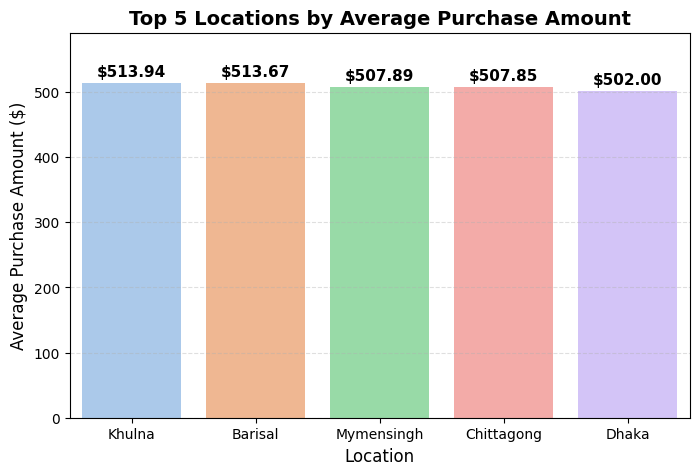

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
ax = sns.barplot(x=top5.index, y=top5.values, palette='pastel')

# Add value labels on top of bars
for i, value in enumerate(top5.values):
    ax.text(i, value + 5, f"${value:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Top 5 Locations by Average Purchase Amount', fontsize=14, weight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Purchase Amount ($)', fontsize=12)
plt.ylim(0, max(top5.values)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


<h1>Level 3: Critical Thinking Insights</h1>

Q1: What factors contribute most to a customer being classified as a return customer?

In [7]:
# Return rate by Gender
return_by_gender = df.groupby('Gender')['Return Customer'].mean()
print(return_by_gender)

# Return rate by Discount
return_by_discount = df.groupby('Discount Availed')['Return Customer'].mean()
print(return_by_discount)

Gender
Female    0.488316
Male      0.495969
Other     0.514639
Name: Return Customer, dtype: float64
Discount Availed
False    0.487056
True     0.512059
Name: Return Customer, dtype: float64


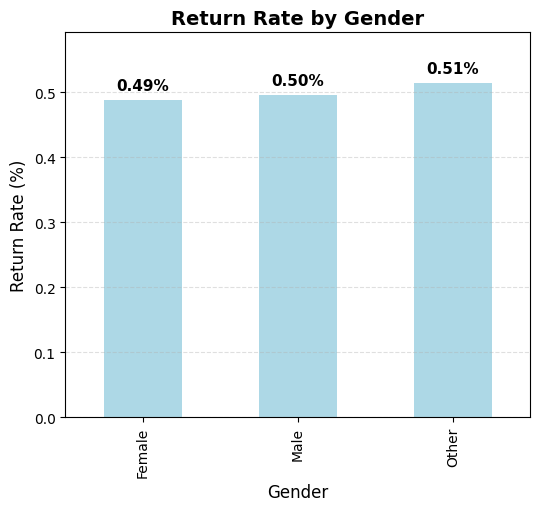

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
ax = return_by_gender.plot(kind='bar', color='lightblue')

# Add value labels on top of bars
for i, value in enumerate(return_by_gender.values):
    ax.text(i, value + max(return_by_gender.values)*0.02, f"{value:.2f}%", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Return Rate by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Return Rate (%)', fontsize=12)
plt.ylim(0, max(return_by_gender.values)*1.15)  # slightly above max for labels
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


Q2: How do payment methods influence customer satisfaction and return rates?

In [111]:
# Average review score and return rate by payment method
payment_summary = df.groupby('Payment Method').agg(
    Avg_Review=('Review Score (1-5)', 'mean'),
    Return_Rate=('Return Customer', 'mean')
)
print(payment_summary)

                  Avg_Review  Return_Rate
Payment Method                           
Bank Transfer       2.988873     0.506047
Cash on Delivery    3.019930     0.489287
Credit Card         2.970414     0.512327
Debit Card          2.996974     0.491175
PayPal              3.000000     0.498695


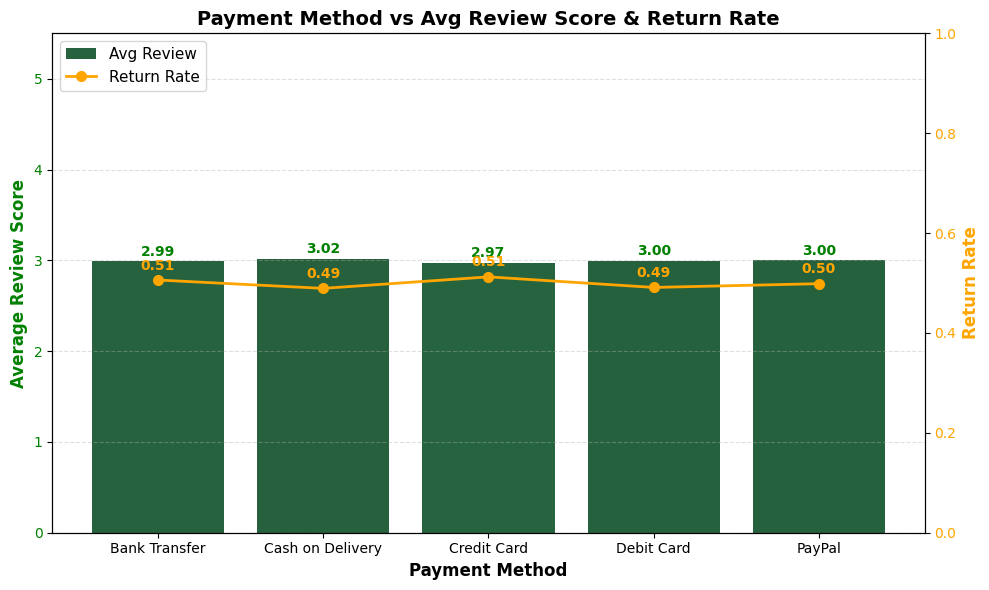

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Example aggregated DataFrame
payment_summary = pd.DataFrame({
    'Payment_Method': ['Bank Transfer', 'Cash on Delivery', 'Credit Card', 'Debit Card', 'PayPal'],
    'Avg_Review': [2.988873, 3.019930, 2.970414, 2.996974, 3.000000],
    'Return_Rate': [0.506047, 0.489287, 0.512327, 0.491175, 0.498695]
})

fig, ax1 = plt.subplots(figsize=(10,6))

# -------------------------------
# Bars for Avg Review Score
# -------------------------------
colors = cm.Greens(payment_summary['Avg_Review'] / max(payment_summary['Avg_Review']))  # gradient green
bars = ax1.bar(payment_summary['Payment_Method'], payment_summary['Avg_Review'],
               color=colors, alpha=0.85, label='Avg Review')

ax1.set_xlabel('Payment Method', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Review Score', fontsize=12, fontweight='bold', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 5.5)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Numeric labels on top of bars
for i, val in enumerate(payment_summary['Avg_Review']):
    ax1.text(i, val + 0.03, f"{val:.2f}", ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='green')

# -------------------------------
# Line plot for Return Rate
# -------------------------------
ax2 = ax1.twinx()
ax2.plot(payment_summary['Payment_Method'], payment_summary['Return_Rate'],
         color='orange', marker='o', linewidth=2, markersize=7, label='Return Rate')
ax2.set_ylabel('Return Rate', fontsize=12, fontweight='bold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 1)
ax2.grid(False)

# Numeric labels on line points
for i, val in enumerate(payment_summary['Return_Rate']):
    ax2.text(i, val + 0.015, f"{val:.2f}", ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='orange')

# -------------------------------
# Title & Legends
# -------------------------------
plt.title('Payment Method vs Avg Review Score & Return Rate', fontsize=14, fontweight='bold')

# Combine legends
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left', fontsize=11, frameon=True)

fig.tight_layout()
plt.show()


Q3: How does the location influence both purchase amount and delivery time?

In [5]:
# Average purchase amount and delivery time by location
import pandas as pd

location_summary = df.groupby('Location').agg(
    Avg_Purchase=('Purchase Amount ($)', 'mean'),
    Avg_Delivery=('Delivery Time (days)', 'mean')
)

print(location_summary)


            Avg_Purchase  Avg_Delivery
Location                              
Barisal       513.674560      7.072800
Chittagong    507.851675      7.020440
Dhaka         502.002504      6.941957
Khulna        513.937072      6.811774
Mymensingh    507.892211      7.099219
Rajshahi      495.544649      7.113130
Rangpur       494.368867      7.031125
Sylhet        494.976427      7.018593


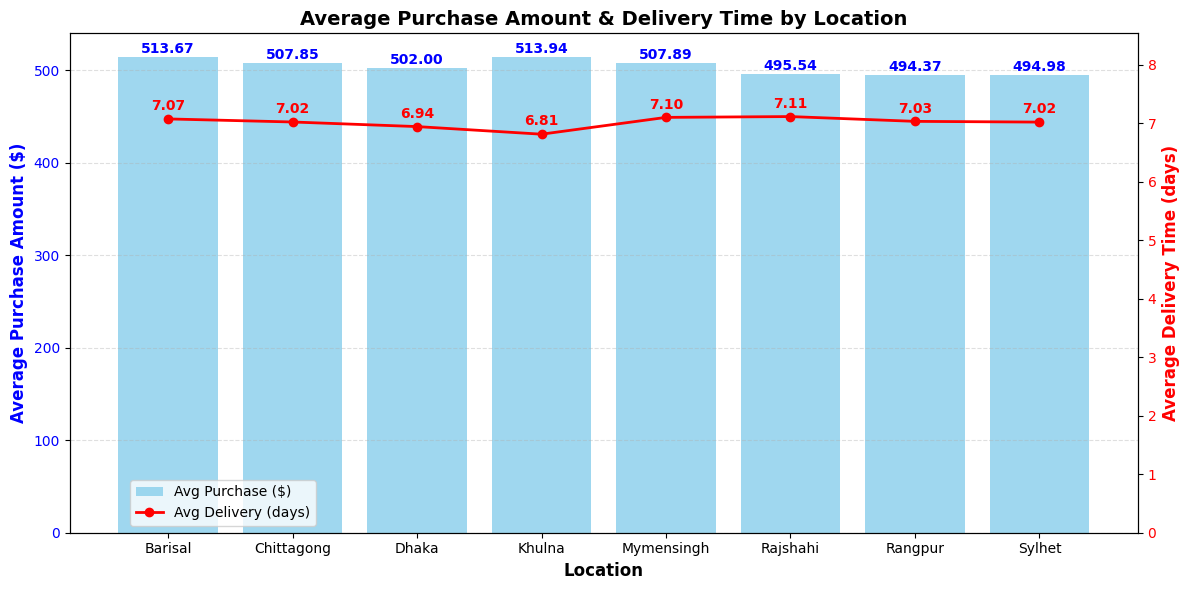

In [6]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# -------------------------------
# Bar chart for Avg Purchase Amount
# -------------------------------
bars = ax1.bar(location_summary.index, location_summary['Avg_Purchase'],
               color='skyblue', alpha=0.8, label='Avg Purchase ($)')

ax1.set_xlabel('Location', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Purchase Amount ($)', fontsize=12, color='blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Numeric labels on top of bars
for i, value in enumerate(location_summary['Avg_Purchase']):
    ax1.text(i, value + 1, f"{value:.2f}", ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='blue')

# -------------------------------
# Line plot for Avg Delivery Time
# -------------------------------
ax2 = ax1.twinx()
ax2.plot(location_summary.index, location_summary['Avg_Delivery'],
         color='red', marker='o', linewidth=2, label='Avg Delivery (days)')
ax2.set_ylabel('Average Delivery Time (days)', fontsize=12, color='red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(location_summary['Avg_Delivery'])*1.2)

# Numeric labels on line
for i, value in enumerate(location_summary['Avg_Delivery']):
    ax2.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='red')

# -------------------------------
# Title
# -------------------------------
plt.title('Average Purchase Amount & Delivery Time by Location', fontsize=14, fontweight='bold')

# -------------------------------
# Combine legends from both axes
# -------------------------------
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='lower left', bbox_to_anchor=(0.05,0), ncol=1, frameon=True)

# -------------------------------
# Layout adjustment & show plot
# -------------------------------
fig.tight_layout()
plt.show()


Q4: What major insights are found? Give a proper explanation.


Average Items Purchased by Customer Satisfaction:
 Customer_Satisfaction
High      4.947639
Low       4.988707
Medium    5.058841
Name: Number_of_Items_Purchased, dtype: float64


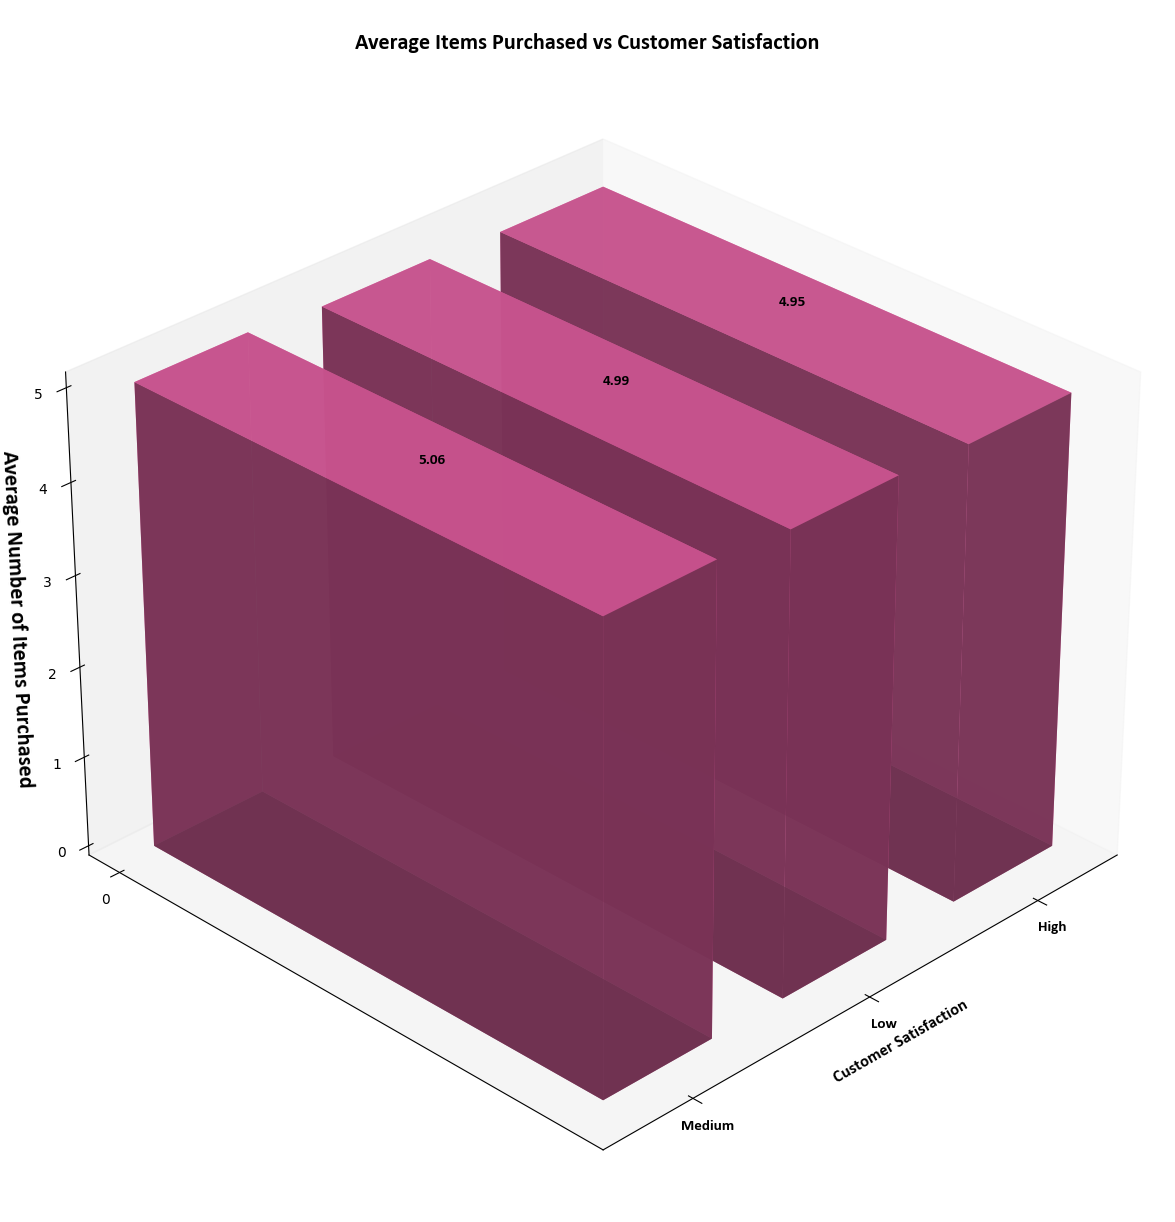

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
from matplotlib.colors import LinearSegmentedColormap

# ===============================
# 1. Prepare Data
# ===============================
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Aggregate average items purchased by customer satisfaction
satisfaction_summary = df.groupby('Customer_Satisfaction')['Number_of_Items_Purchased'].mean().sort_index()
print("\nAverage Items Purchased by Customer Satisfaction:\n", satisfaction_summary)

# ===============================
# 2. 3D White→Pink Glass-Style Bar Chart
# ===============================
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(satisfaction_summary))       # x positions
y = np.zeros(len(satisfaction_summary))        # y positions (depth)
z = np.zeros(len(satisfaction_summary))        # base of bars
dx = np.ones(len(satisfaction_summary)) * 0.6  # width in x
dy = np.ones(len(satisfaction_summary)) * 0.6  # width in y
dz = satisfaction_summary.values               # bar heights

# White → Pink gradient
white_pink = LinearSegmentedColormap.from_list('white_pink', ['#ffffff', '#ff69b4'])
colors = white_pink(dz / max(dz))

# Draw 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color=colors, alpha=0.85, shade=True)

# ===============================
# 3. Axis Labels & Title
# ===============================
ax.set_xticks(x + dx/2)
ax.set_xticklabels(satisfaction_summary.index, fontweight='bold', fontsize=11, fontname='Calibri')
ax.set_xlabel('Customer Satisfaction', fontweight='bold', fontsize=12, fontname='Calibri')

ax.set_yticks([0])  # just one tick for depth

ax.set_zlabel('Average Number of Items Purchased', fontsize=16, fontweight='bold', fontname='Calibri')  # larger font
ax.set_title("\n"'Average Items Purchased vs Customer Satisfaction', fontsize=16, fontweight='bold', fontname='Calibri')

# ===============================
# 4. Numeric labels on top of bars
# ===============================
for i, value in enumerate(dz):
    ax.text(x[i]+0.3, y[i]+0.3, value + 0.05, f'{value:.2f}',
            color='black', fontsize=11, fontweight='bold', fontname='Calibri')

# ===============================
# 5. Adjust 3D view
# ===============================
ax.view_init(elev=30, azim=45)

# Optional: hide grid for cleaner modern look
ax.grid(False)

plt.show()
